In [1]:
from vpny_qmlt.trader.base import BacktestingMode
import warnings
import rank_strategy as strategy
from importlib import reload
from vpny_qmlt.gateway.backtesting import engine
from vpny_qmlt.trader.optimize import OptimizationSetting
from vpny_qmlt.trader.setting import SETTINGS
from vpny_qmlt.trader.constant import Interval

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
SETTINGS["log.level"] = logging.INFO

warnings.filterwarnings('ignore')

engine = engine.BacktestingEngine()

#                     )
engine.set_parameters(
    interval=Interval.MINUTE,  # 周期，分为tick，分钟，小时
    start=20200101,
    # end=20210712,  # start,end是根据tranding_day来的, 输入int如20210511
    slippage_tick=0,
    capital=20000000,
    vt_symbols=["rb99.SHFE"],  # ["rb99.SHFE", ],
    rates=[1 / 10000],
    source_dir="Y:\\DataBase_RQ_files\\",  # "Y:\\DataBase_RQ_files\\",
    margin_rates=[0.13]
)
engine.add_strategy(strategy.Test01, "test", ['rb99.SHFE'], {
    'shift_rtn': 95,
    "test": {'sample_size': 10000,
             "bins" :30},
})


In [2]:
engine.run()
engine.show_backtesting_result(save=True)
# engine.get_show_engine().show_sub_daily_result("rb99.SHFE")
# engine.get_show_engine().show_sub_daily_result("i99.DCE")
# engine.show_backtesting_plot()




2023-04-19 11:55:55.141943	开始加载历史数据
2023-04-19 11:55:58.694154	回测开始,Bar数量=26.5万行
2020-01-02 09:01:00.000001	指标初始
2020-01-02 09:01:00.000002	信号初始化
2020-01-02 09:01:00.000005	new date 20181206
2020-01-02 09:01:00.000006	new date 20181207
2020-01-02 09:01:00.000007	new date 20181210
2020-01-02 09:01:00.000008	new date 20181211
2020-01-02 09:01:00.000009	new date 20181212
2020-01-02 09:01:00.000010	new date 20181213
2020-01-02 09:01:00.000011	new date 20181214
2020-01-02 09:01:00.000012	new date 20181217
2020-01-02 09:01:00.000013	new date 20181218
2020-01-02 09:01:00.000014	new date 20181219
2020-01-02 09:01:00.000015	new date 20181220
2020-01-02 09:01:00.000016	new date 20181221
2020-01-02 09:01:00.000017	new date 20181224
2020-01-02 09:01:00.000018	new date 20181225
2020-01-02 09:01:00.000019	new date 20181226
2020-01-02 09:01:00.000020	new date 20181227
2020-01-02 09:01:00.000021	new date 20181228
2020-01-02 09:01:00.000022	new date 20190102
2020-01-02 09:01:00.000023	new date 20190103

ZeroDivisionError: float division by zero

In [ ]:
# import numpy as np


# def low(data: np.ndarray, n: int) -> np.ndarray:
#     """
#     计算n期的low与当前值差多少期/总期数
#     """
#     def rolling_window(a, window):
#         shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
#         strides = a.strides + (a.strides[-1],)
#         return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

#     def find_low_index(x):
#         return np.argmin(x)

#     rolling_data = rolling_window(data, n)
#     low_index = np.apply_along_axis(find_low_index, 1, rolling_data)
#     return (n - low_index) / n


# # Example usage
# data = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1])
# n = 3
# def low(data: pd.Series, n):
#     """
#     计算n期的low与当前值差多少期/总期数
#     """
#     low_index = data.rolling(n).apply(lambda x: np.argmin(x))
#     return (n - low_index) / n
# ds=pd.Series(data)
# r2 =low(ds, n)
# #对比low1和low的运行速度
# %timeit low1(data, n)
# %timeit low(ds, n)

In [ ]:
# engine.show_backtesting_result(save=True)               # 把总体回测结果保存到本地
order_details = engine.se.get_order_detail(save=True)   # 获取订单详情保存到本地
pnl_details = engine.se.get_pnl_fifo_detail(save=True)  # 获取逐笔盈亏详情 保存到本地


In [ ]:
pnl_details = pd.read_csv("pnl_fifo_detail.csv")
pnl_details

In [ ]:
a = {1:1,2:2,3:3}
a.pop(1)
a

In [ ]:
d ={"a":1,"b":2,    "c":3}

for k, v in d.items():
    d.pop(k)
d

In [ ]:
d = {}

for k, v in d.copy().items():
    d.pop(k)



In [ ]:
from vpny_qmlt.trader.optimize import OptimizationSetting
op_settings = {}

op_setting = OptimizationSetting()
sf18_parameter = OptimizationSetting()
liqka_parameter = OptimizationSetting()


op_setting.add_parameter("minbar", 5)

sf18_parameter.add_parameter("p", 6, 10, 1)
sf18_parameter.add_parameter("p_short", 40, 41, 1)
op_setting.add_optimizationsetting("sf18_parameter", sf18_parameter)

liqka_parameter.add_parameter("TRS", 0.03, 0.04, 0.01)
liqka_parameter.add_parameter("delta_t", 0.02)
liqka_parameter.add_parameter("min_thre", 0.3)
op_setting.add_optimizationsetting("liqka", liqka_parameter)

op_settings["sf18"] = op_setting
op_settings["sf18_i99"] = op_setting

a,b =engine.run_optimization(op_settings, target_name="total profit rate", output=True)



In [ ]:
c, d = engine.run_ga_optimization(
    op_settings, target_name="total profit rate", output=True)


In [ ]:
# 把 engine.optimize_result 保存成为pkl文件
import pickle
with open("optimize_result.pkl", "wb") as f:
    pickle.dump(engine.optimize_result, f)
with open ("ga_optimize_result.pkl", "wb") as f:
    pickle.dump(engine.ga_optimize_result, f)
        


In [ ]:

# engine.get_show_engine().calculate_daily_result()


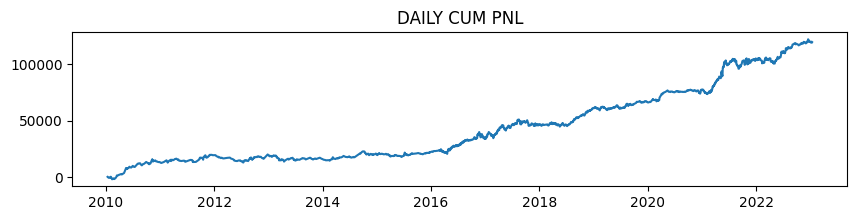
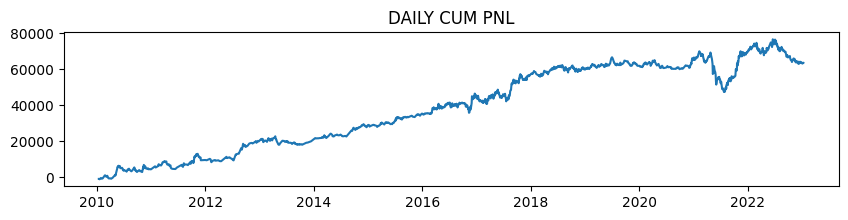

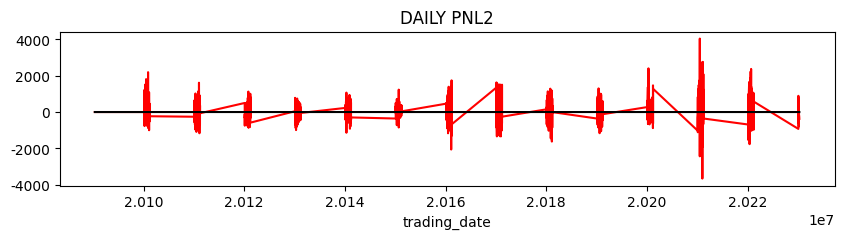